1. Pregnancies: homilador bo'lish soni
2. Glucose: glyukozaga test natijasi
3. BloodPressure: diastolik qon bosimi (mm Hg)
4. SkinThickness: Triceps teri burmasining qalinligi (mm)
5. Insulin: 2 soatlik sarum insulini (mu U/ml)
6. BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)
7. DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi
9. Age: Yosh (yil)
10. Outcome: Class (0 - diabet yo'q, 1 - diabet)



Kutubxonalarni yuklaymiz

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

Datasetni yuklab olamiz google colabga

In [3]:
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


X va y ga aajratamiz

In [5]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome'].copy()

Train va test qismlarga ajratib olamiz

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

Jadvalni narmalizatsiya qilib olamiz

In [7]:
num_pyp = Pipeline([

  ('num',StandardScaler())
])
X_train = num_pyp.fit_transform(X_train.values)
X_test = num_pyp.fit_transform(X_test.values)

Modelni tarbiyalaymiz

In [8]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=11)

In [9]:
from sklearn.model_selection import GridSearchCV
p_g = {'n_neighbors':np.arange(1,20)}
k_g = GridSearchCV(knn,p_g,cv=5)


In [10]:
k_g.fit(X_train,Y_train)
k_g.cv_results_['rank_test_score']
k_g.best_params_

{'n_neighbors': 11}

In [16]:
d_t = DecisionTreeClassifier()
d_t.fit(X_train,Y_train)

DecisionTreeClassifier()

In [18]:
r_f = RandomForestClassifier()
r_f.fit(X_train,Y_train)

RandomForestClassifier()

In [17]:
xb = XGBClassifier()
xb.fit(X_train,Y_train)

XGBClassifier()

Modelni test qilib Ko'ramiz

In [19]:
k_y = knn.predict(X_test)
d_y = d_t.predict(X_test)
rf_y = r_f.predict(X_test)
xb1 = xb.predict(X_test)

Modelni baholaymiz

In [30]:
print(classification_report(Y_test,k_y))
print(classification_report(Y_test,d_y))
print(classification_report(Y_test,rf_y))
print(classification_report(Y_test,xb1))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        99
           1       0.60      0.65      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

              preci

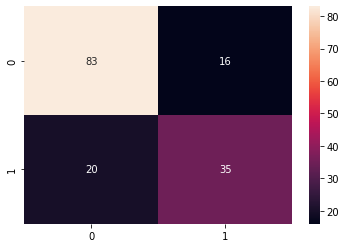

In [21]:
sns.heatmap(confusion_matrix(Y_test,xb1),annot=True)
plt.show()

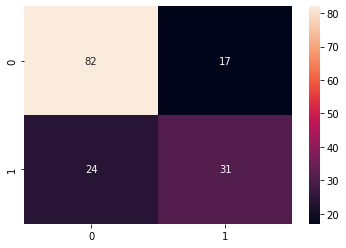

In [29]:
sns.heatmap(confusion_matrix(Y_test,k_y),annot=True)
plt.show()

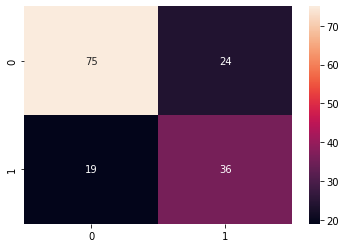

In [23]:
sns.heatmap(confusion_matrix(Y_test,d_y),annot=True)
plt.show()

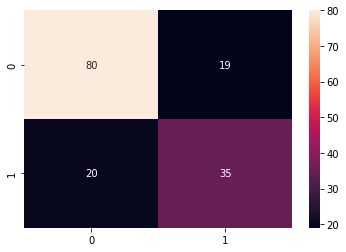

In [24]:
sns.heatmap(confusion_matrix(Y_test,rf_y),annot=True)
plt.show()

In [26]:
print(metrics.accuracy_score(Y_test,k_y))
print(metrics.accuracy_score(Y_test,d_y))
print(metrics.accuracy_score(Y_test,rf_y))
print(metrics.accuracy_score(Y_test,xb1))

0.7337662337662337
0.7207792207792207
0.7467532467532467
0.7662337662337663
